##This dataset contains water quality measurements and assessments related to potability,
which is the suitability of water for human consumption.
The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. 
Each row in the dataset represents a water sample with specific attributes, and the "Potability"column 
indicates whether the water is suitable for consumption.

Columns:

pH: The pH level of the water.
Hardness: Water hardness, a measure of mineral content.
Solids: Total dissolved solids in the water.
Chloramines: Chloramines concentration in the water.
Sulfate: Sulfate concentration in the water.
Conductivity: Electrical conductivity of the water.
Organic_carbon: Organic carbon content in the water.
Trihalomethanes: Trihalomethanes concentration in the water.
Turbidity: Turbidity level, a measure of water clarity.
Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

In [423]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [424]:
df=pd.read_csv("C:/Users/apurb_oi8roye/Desktop/Water_Prediction/water_potability.csv")

In [425]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [426]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [427]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [429]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

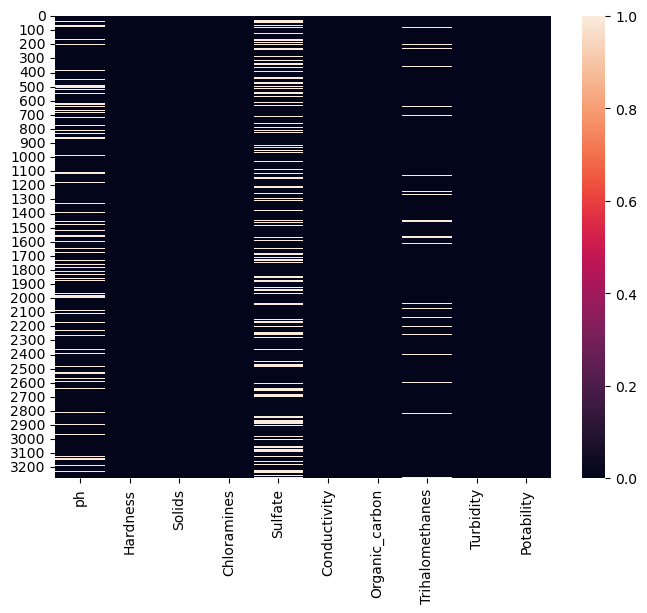

In [430]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

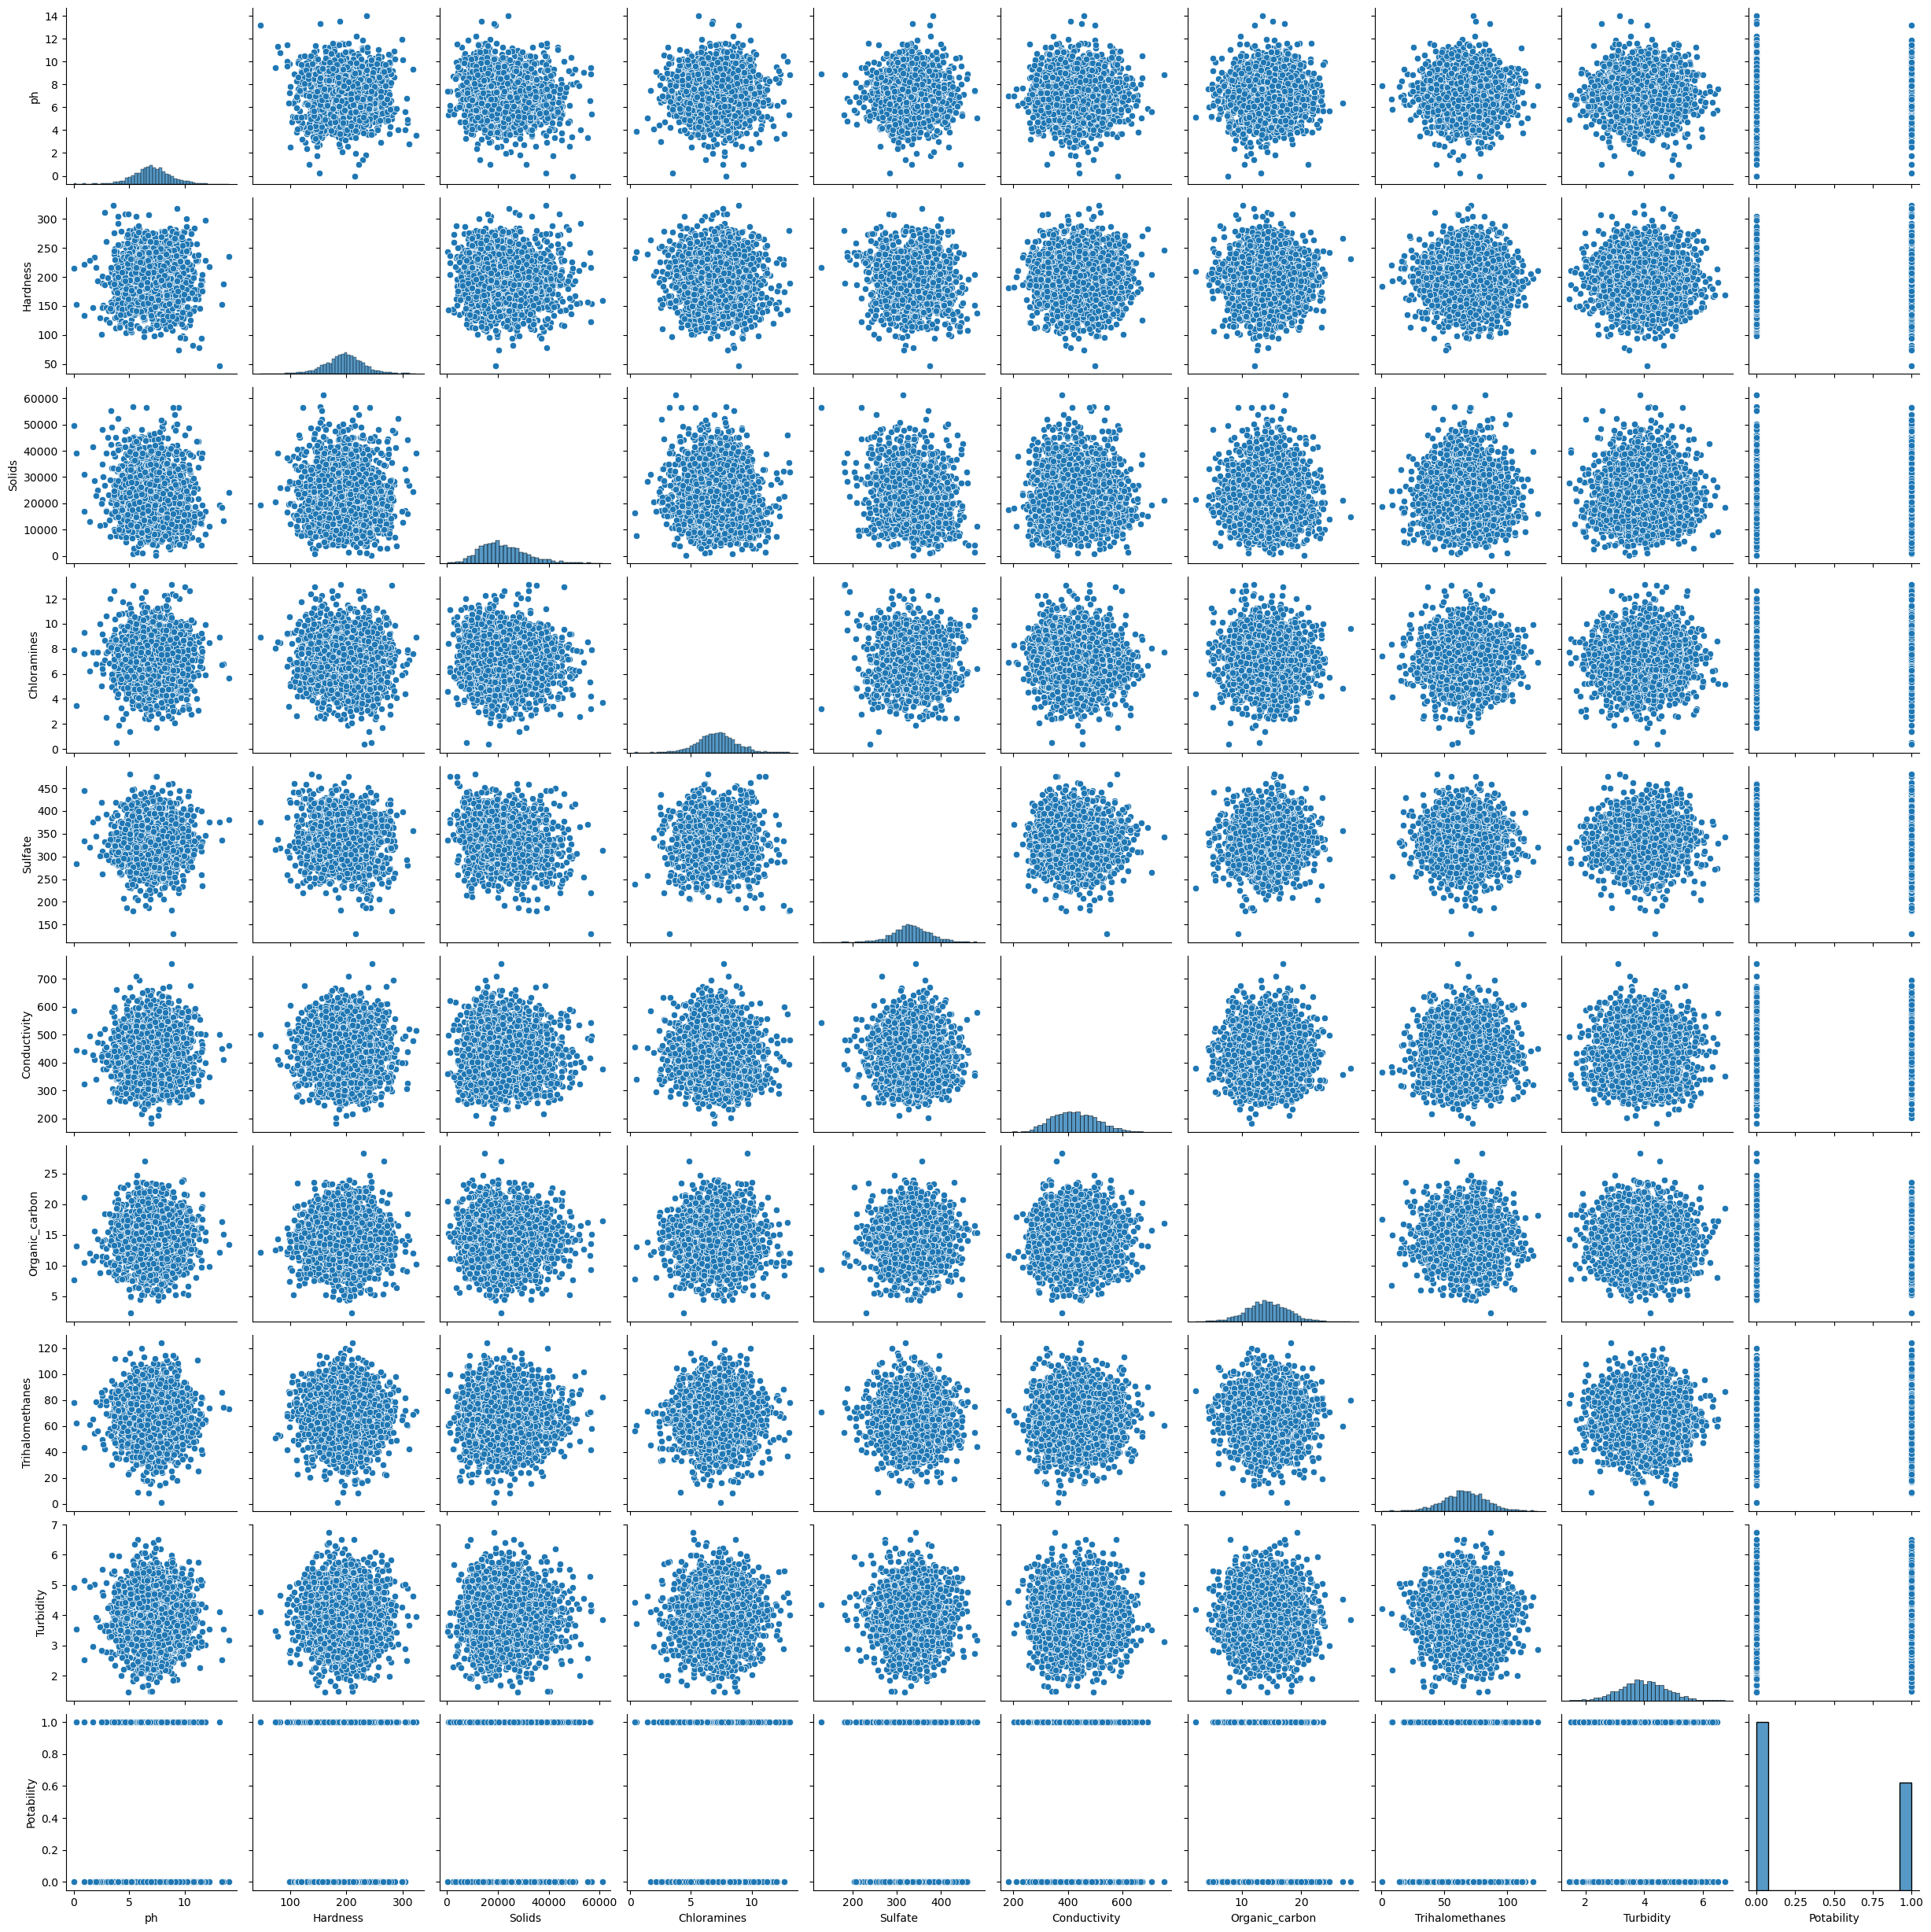

In [431]:
sns.pairplot(df)

<Axes: >

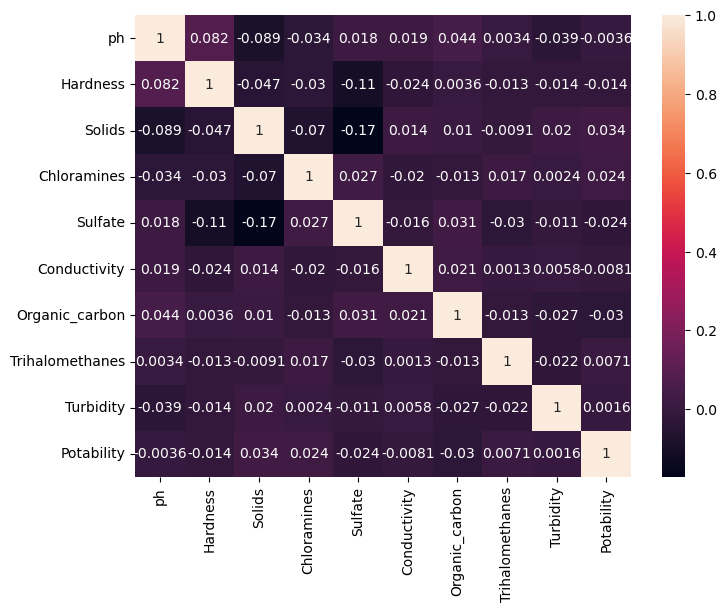

In [432]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Potability', ylabel='count'>

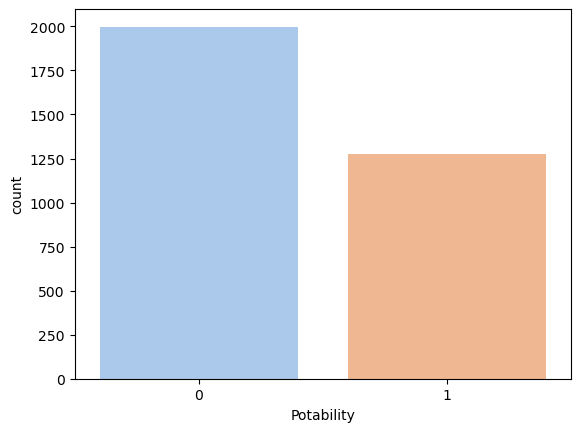

In [433]:
sns.countplot(x="Potability", data=df, hue="Potability", palette="pastel", legend=False)


In [434]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

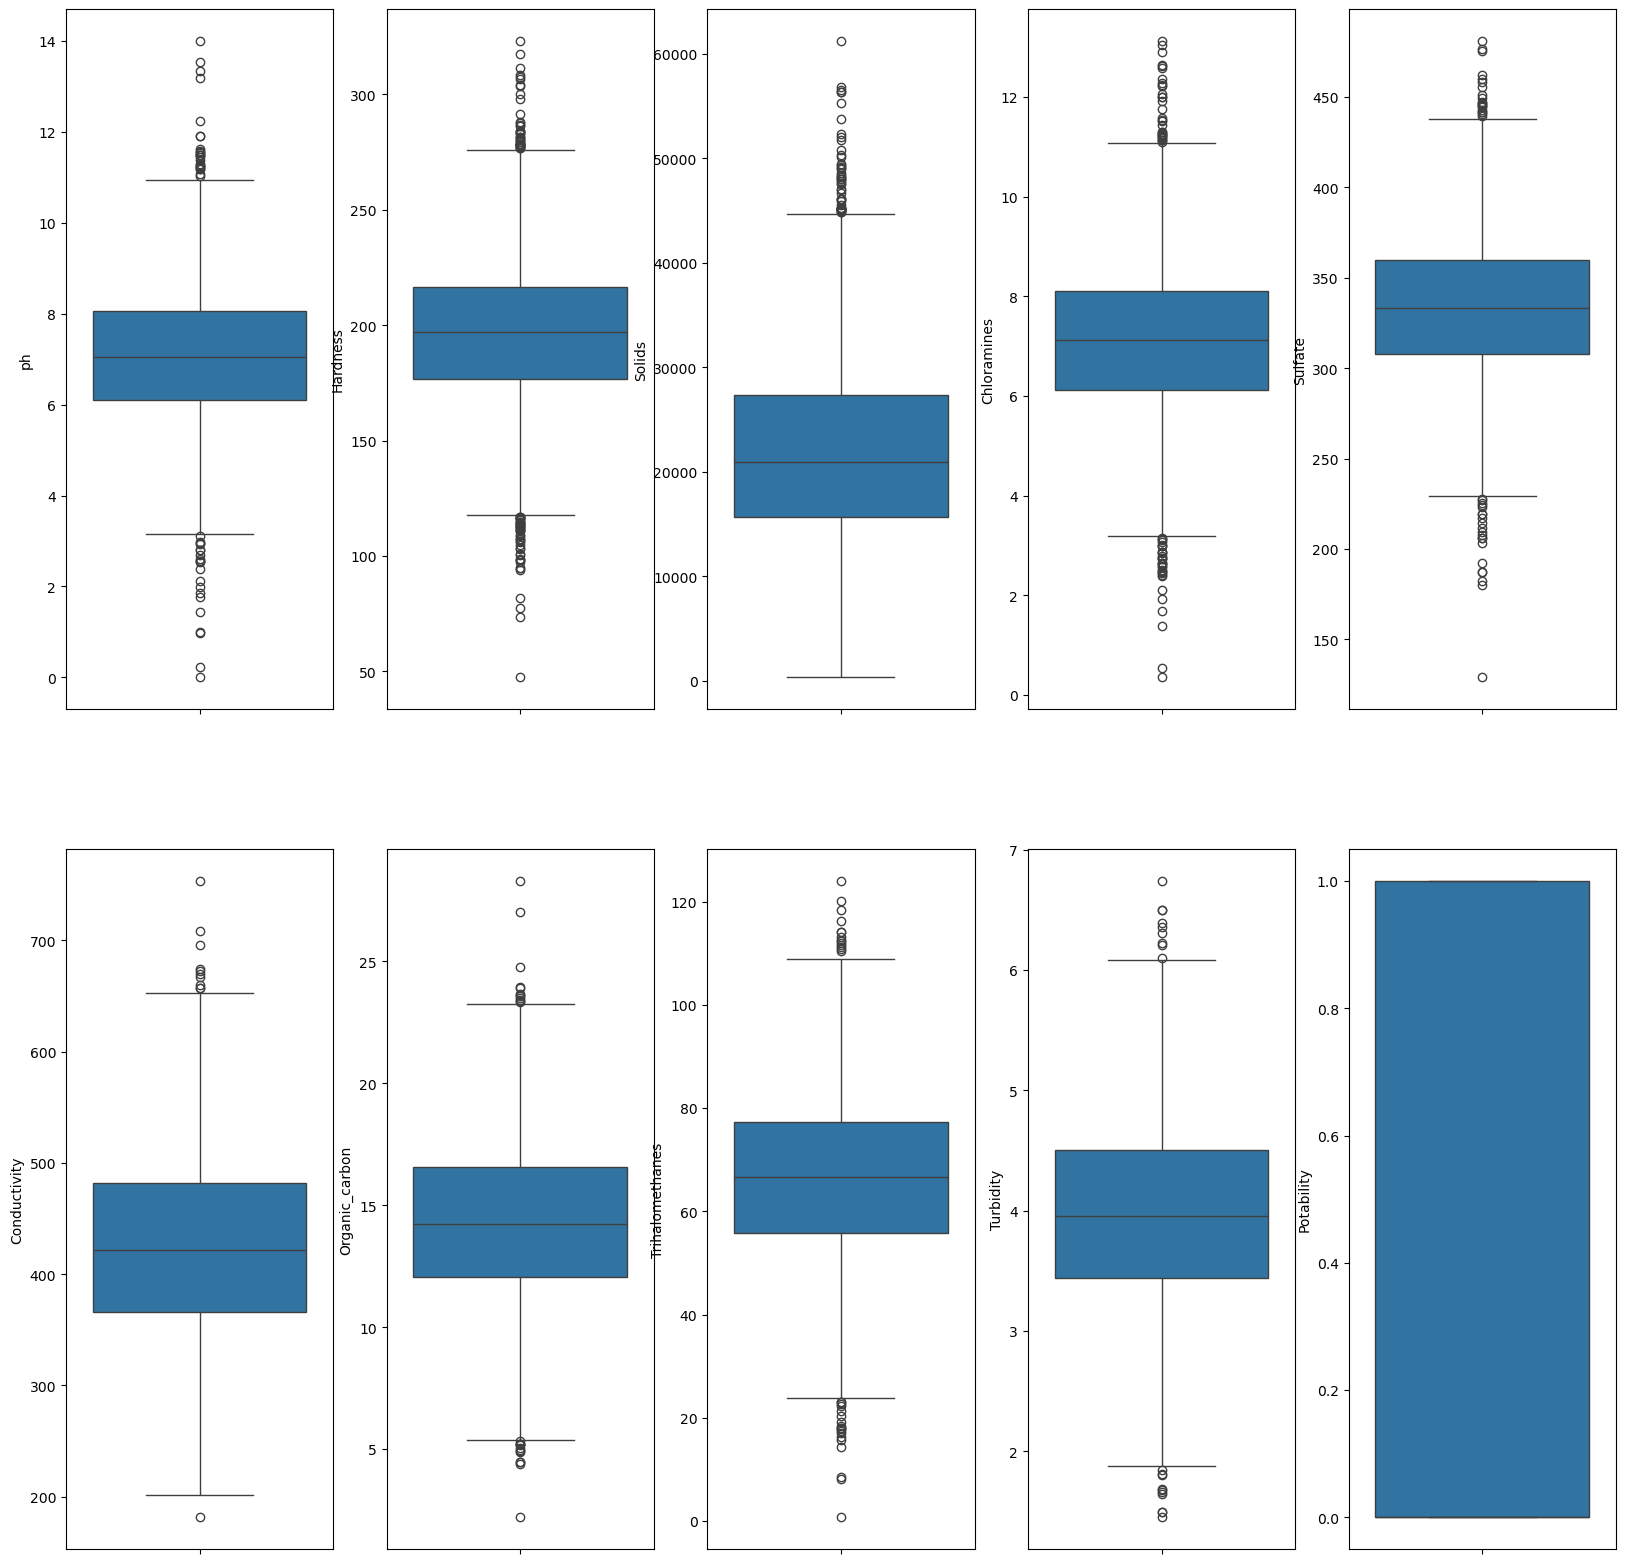

In [435]:
#check for outliers
fig, ax = plt.subplots(ncols=5,nrows=2,figsize=(20,20))
ax=ax.flatten()
index=0
for col,values in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1

In [436]:
fig=px.pie(df,names="Potability", hole=0.2)
fig.update_layout(width=400, height=400)
fig.show()

 pH vs. Turbidity
Possible Relationship:

High turbidity often indicates contamination, which can also affect pH levels.
Safe drinking water usually has a neutral pH (6.5 - 8.5), while high turbidity suggests impurities.
** Expected Pattern:

Lower pH (<6.5) and high turbidity → Unsafe water
Neutral pH (6.5 - 8.5) and low turbidity → Safe water

In [438]:
fig=px.scatter(df,x="ph",y="Turbidity",color="Potability",template="plotly_dark")

fig.update_layout(width=900, height=400)
fig.show()

TDS vs. Conductivity
Possible Relationship:

TDS (Total Dissolved Solids) and Conductivity are usually positively correlated.
Higher TDS means more dissolved ions, increasing conductivity.
** Expected Pattern:

Low TDS, Low Conductivity → Pure Water
High TDS, High Conductivity → Possible contamination (minerals, salts, pollutants)

In [441]:
fig=px.scatter(df,x="Solids",y="Conductivity",color="Potability",template="plotly_dark")

fig.update_layout(width=900, height=400)
fig.show()

In [442]:
#for null Value
#1. remove the null value
#2. fill with mean value (I used this)

Text(0, 0.5, 'Missing Value % age')

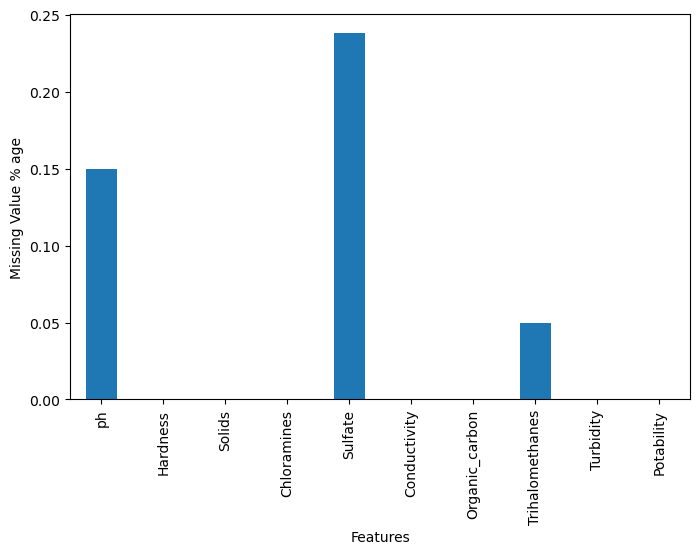

In [443]:
df.isnull().mean().plot.bar(figsize=(8,5))
plt.xlabel("Features")
plt.ylabel("Missing Value % age")

fill the missing value with mean of that feature 
**Advantages (Why It’s Useful)
Prevents Data Loss

Instead of deleting rows with missing values (which reduces data size), imputing with the mean keeps all samples.

Simple & Fast

Mean imputation is computationally inexpensive and easy to apply.

Works Well for Normally Distributed Data

If a feature follows a normal distribution, mean imputation maintains the overall trend without biasing the data too much.

In [446]:
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [451]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

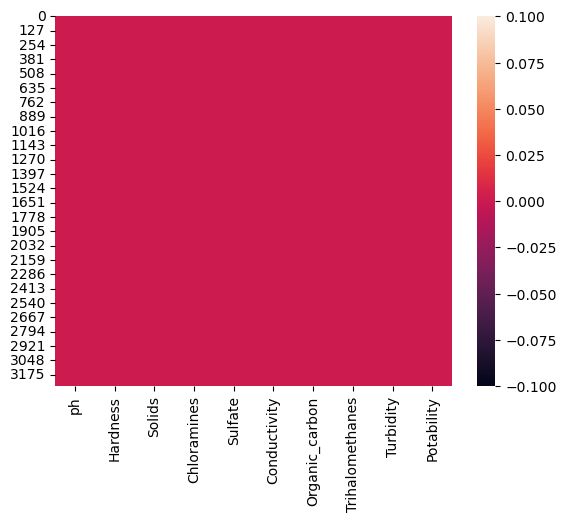

In [452]:
sns.heatmap(df.isnull())

In [454]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [455]:
x=df.drop("Potability",axis=1)
y=df["Potability"]

In [456]:
x.shape,y.shape

((3276, 9), (3276,))

In [458]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [459]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [460]:
x_train.shape,x_test.shape

((2620, 9), (656, 9))

Logistic Regression

Logistic Regression is a good choice for binary classification, such as predicting whether water is potable (1) or not potable (0). 

In [462]:
#object for LR
model_LR=LogisticRegression()

In [463]:
#train the model
model_LR.fit(x_train,y_train)

LogisticRegression()

In [464]:
pred_LR=model_LR.predict(x_test)

In [465]:
#accuracy
accuracy_LR=accuracy_score(y_test,pred_LR)
print("accuracy for logistic regression is:",accuracy_LR*100)

accuracy for logistic regression is: 60.518292682926834


Decision Tree

A Decision Tree is a powerful alternative to Logistic Regression for classifying water as potable (1) or non-potable (0). Unlike Logistic Regression, which assumes a linear relationship, Decision Trees capture non-linear interactions between features, making them more flexible and interpretable for water quality analysis.

Decision Trees rank features based on importance during training.

This helps identify which water quality parameters have the highest impact on potability

In [597]:
from sklearn.tree import DecisionTreeClassifier


In [599]:
model_dt=DecisionTreeClassifier(max_depth=4)

In [601]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [603]:
pred_DT=model_dt.predict(x_test)

In [605]:
accuracy_dt=accuracy_score(y_test,pred_DT)
print("accuracy for Decision Tree is:",accuracy_dt*100)

accuracy for Decision Tree is: 63.109756097560975


<Axes: >

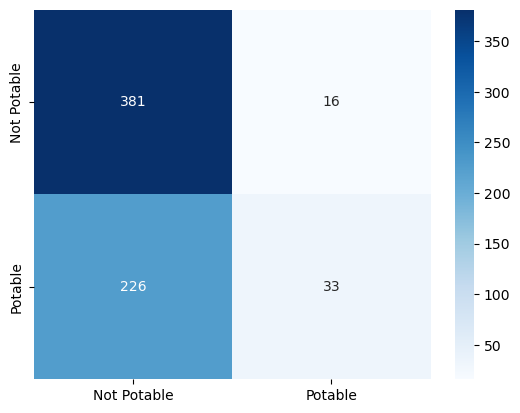

In [607]:
cfn= confusion_matrix(y_test,pred_DT)
sns.heatmap(cfn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])

Random Forest Classifier

Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their predictions to improve accuracy and reduce overfitting. It works well for water quality prediction because:

✅ Handles Missing & Noisy Data: Automatically deals with missing values and outliers.
✅ Reduces Overfitting: Unlike a single decision tree, it generalizes better.
✅ Feature Importance: Identifies which water quality factors (pH, turbidity, sulfate, etc.) impact potability the most.
✅ Better Performance on Imbalanced Data: Works well even if potable vs. non-potable classes are unbalanced.



In [610]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()

model_rf.fit(x_train_resampled, y_train_resampled)

pred_rf = model_rf.predict(x_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print(" Accuracy for RandomForest:", accuracy_rf * 100)

 Accuracy for RandomForest: 68.90243902439023


In [612]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
model_rf.fit(x_train_resampled, y_train_resampled)

pred_rf = model_rf.predict(x_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Updated Accuracy for RandomForest:", accuracy_rf * 100)

Updated Accuracy for RandomForest: 68.4451219512195


In [614]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
model_rf.fit(x_train, y_train)

pred_rf = model_rf.predict(x_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Updated Accuracy for RandomForest:", accuracy_rf * 100)

Updated Accuracy for RandomForest: 69.66463414634147


<Axes: >

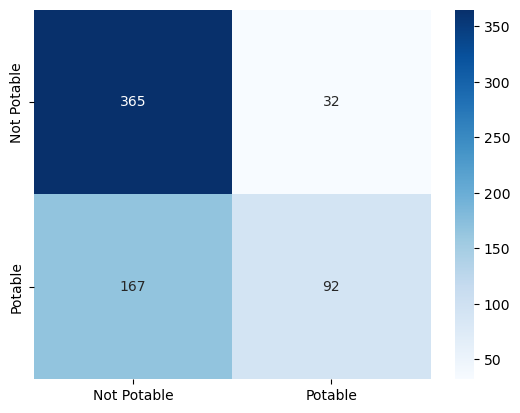

In [615]:
cfn= confusion_matrix(y_test,pred_rf)
sns.heatmap(cfn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])

K-NN

K-NN (K-Nearest Neighbors) is a simple, non-parametric algorithm used for classification. It predicts the class of a new sample based on the majority class of its 'K' closest neighbors in feature space.

Why Use K-NN for Water Quality Prediction?
🔹 No Assumption About Data Distribution – Works well for non-linear datasets.
🔹 Handles Multi-Class Problems – Can classify multiple water quality categories.
🔹 Distance-Based Learning – Considers water quality features (pH, sulfate, turbidity, etc.) in a meaningful way

In [617]:
from sklearn.neighbors import KNeighborsClassifier

best_k = 0
best_accuracy = 0

for i in range(3, 13):
    model_NN = KNeighborsClassifier(n_neighbors=i)
    model_NN.fit(x_train, y_train)  # Ensure data is scaled
    pred_NN = model_NN.predict(x_test)
    
    accuracy_NN = accuracy_score(y_test, pred_NN)
    print(f"Accuracy for K-NN at K={i}: {accuracy_NN * 100:.2f}%")

    # Store the best K value
    if accuracy_NN > best_accuracy:
        best_accuracy = accuracy_NN
        best_k = i
print(f"\n Best K: {best_k} with Accuracy: {best_accuracy * 100}")

Accuracy for K-NN at K=3: 61.28%
Accuracy for K-NN at K=4: 64.18%
Accuracy for K-NN at K=5: 64.48%
Accuracy for K-NN at K=6: 64.33%
Accuracy for K-NN at K=7: 63.87%
Accuracy for K-NN at K=8: 66.31%
Accuracy for K-NN at K=9: 65.70%
Accuracy for K-NN at K=10: 65.24%
Accuracy for K-NN at K=11: 66.31%
Accuracy for K-NN at K=12: 66.46%

 Best K: 12 with Accuracy: 66.46341463414635


Support vector classifier

Support Vector Classifier (SVC) is a powerful algorithm for classification tasks. It works by finding the optimal hyperplane that separates different classes with the maximum margin.

 Why Use SVC for Water Quality Prediction?
✔ Works Well on Non-Linear Data – Uses kernel tricks to handle complex relationships.
✔ Effective for Small & Medium Datasets – Works better than K-NN in many cases.
✔ Robust to Outliers – Maximizes the margin to avoid overfitting.

In [619]:
from sklearn.svm import SVC
model_svm=SVC(kernel="rbf",C=1.0, gamma="auto", random_state=42)
model_svm.fit(x_train,y_train)
pred_svm= model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy for SVM:",accuracy_svm*100)

Accuracy for SVM: 67.53048780487805


In [620]:
from sklearn.svm import SVC
model_svm=SVC(kernel="rbf",C=1, gamma=0.1, random_state=42)
model_svm.fit(x_train,y_train)
pred_svm= model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy for SVM:",accuracy_svm*100)

Accuracy for SVM: 67.6829268292683


AdaBoost Classifier

AdaBoost (Adaptive Boosting) is an ensemble learning method that improves weak classifiers by combining multiple models iteratively. It assigns more weight to misclassified samples in each iteration, making the model more accurate and robust.

 Why Use AdaBoost for Water Quality Prediction?
✔ Boosts Weak Classifiers → Works well with Decision Trees as base models.
✔ Handles Noisy Data → Focuses on hard-to-classify points.
✔ Reduces Overfitting → Generalizes well for real-world data.
✔ Works Well for Imbalanced Data → Adjusts weight of misclassified samples.

In [622]:
from sklearn.ensemble import AdaBoostClassifier
# Train AdaBoost model
model_ada = AdaBoostClassifier(n_estimators=100, learning_rate=1, algorithm="SAMME", random_state=42)
model_ada.fit(x_train, y_train)

# Predict on test set
y_pred_ada = model_ada.predict(x_test)

# Evaluate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada * 100)


AdaBoost Accuracy: 63.262195121951216


XGBOOST

XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning algorithm that improves classification accuracy by using gradient boosting and regularization techniques.

 Why Use XGBoost for Water Quality Prediction?
✔ Handles Missing Data Well – Can learn from incomplete features.
✔ Works Well on Large Datasets – Faster than AdaBoost & Random Forest.
✔ Boosts Weak Models Efficiently – Uses gradient boosting for better performance.
✔ Prevents Overfitting – Uses L1 & L2 regularization.




In [624]:
!pip install xgboost


In [625]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [626]:
from xgboost import XGBClassifier

# Train XGBoost model
model_xg = XGBClassifier(n_estimators=200, learning_rate=0.03, random_state=42)
model_xg.fit(x_train, y_train)

# Predict on test set
y_pred_xg = model_xg.predict(x_test)

# Evaluate accuracy
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print("AdaBoost Accuracy:", accuracy_xg * 100)


AdaBoost Accuracy: 68.4451219512195


In [627]:
models=pd.DataFrame({
    "Models":["Logistic Regression","Decision Tree","Random Forest","K-Nearest Neighbors","SVM","ADA BOOST","XGBOOST"],
    "Accuracy Score":[      accuracy_LR * 100, 
        accuracy_dt * 100, 
        accuracy_rf * 100, 
        accuracy_NN * 100, 
        accuracy_svm * 100, 
        accuracy_ada * 100, 
        accuracy_xg * 100]
})

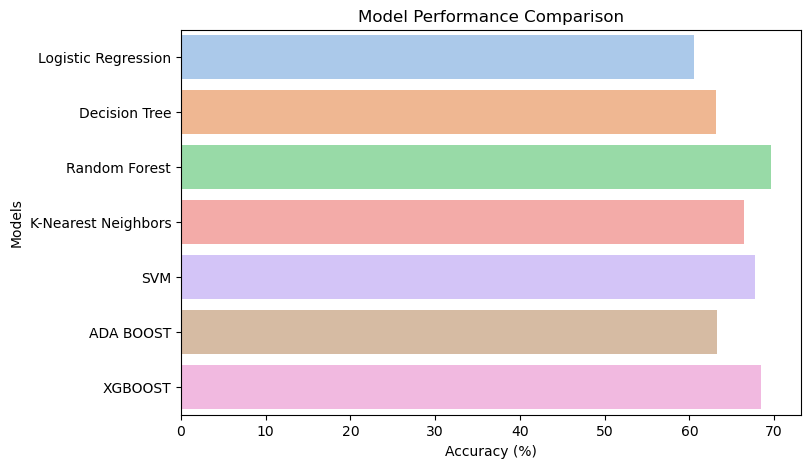

In [663]:
# Plot a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy Score", y="Models", data=models, hue="Models",palette="pastel",legend=False)
plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.title("Model Performance Comparison")

plt.show()

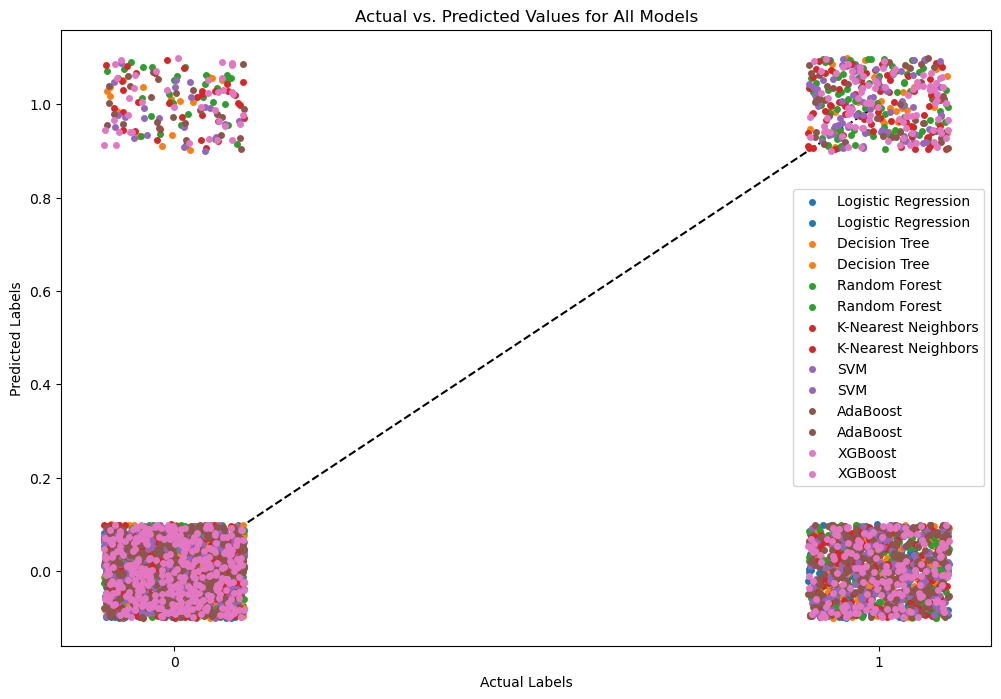

In [701]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Store actual vs predicted values
predictions = {
"Logistic Regression": pred_LR,
    "Decision Tree": pred_DT,
    "Random Forest": pred_rf,
    "K-Nearest Neighbors": pred_NN,
    "SVM": pred_svm,
    "AdaBoost": y_pred_ada,
    "XGBoost": y_pred_xg
}

plt.figure(figsize=(12, 8))

# Plot for each model with jitter to avoid overlapping points
for model_name, y_pred in predictions.items():
    sns.stripplot(x=y_test, y=y_pred + np.random.uniform(-0.1, 0.1, size=len(y_pred)), label=model_name, jitter=True)

# Ideal predictions reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", linestyle="--")

plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Actual vs. Predicted Values for All Models")
plt.legend()
plt.show()


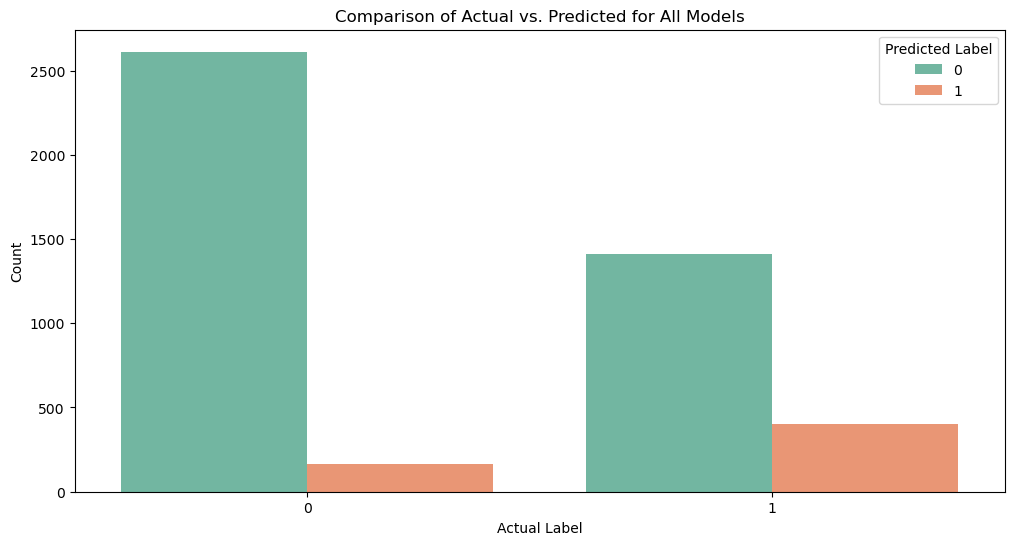

In [672]:
import pandas as pd

# Convert to DataFrame for visualization
comparison_df = pd.DataFrame({
    "Actual": y_test,
     "Logistic Regression": pred_LR,
    "Decision Tree": pred_DT,
    "Random Forest": pred_rf,
    "K-Nearest Neighbors": pred_NN,
    "SVM": pred_svm,
    "AdaBoost": y_pred_ada,
    "XGBoost": y_pred_xg
})

# Melt for seaborn visualization
melted_df = comparison_df.melt(id_vars=["Actual"], var_name="Model", value_name="Predicted")

plt.figure(figsize=(12, 6))
sns.countplot(x="Actual", hue="Predicted", data=melted_df, palette="Set2")
plt.title("Comparison of Actual vs. Predicted for All Models")
plt.xlabel("Actual Label")
plt.ylabel("Count")
plt.legend(title="Predicted Label", loc="upper right")
plt.show()


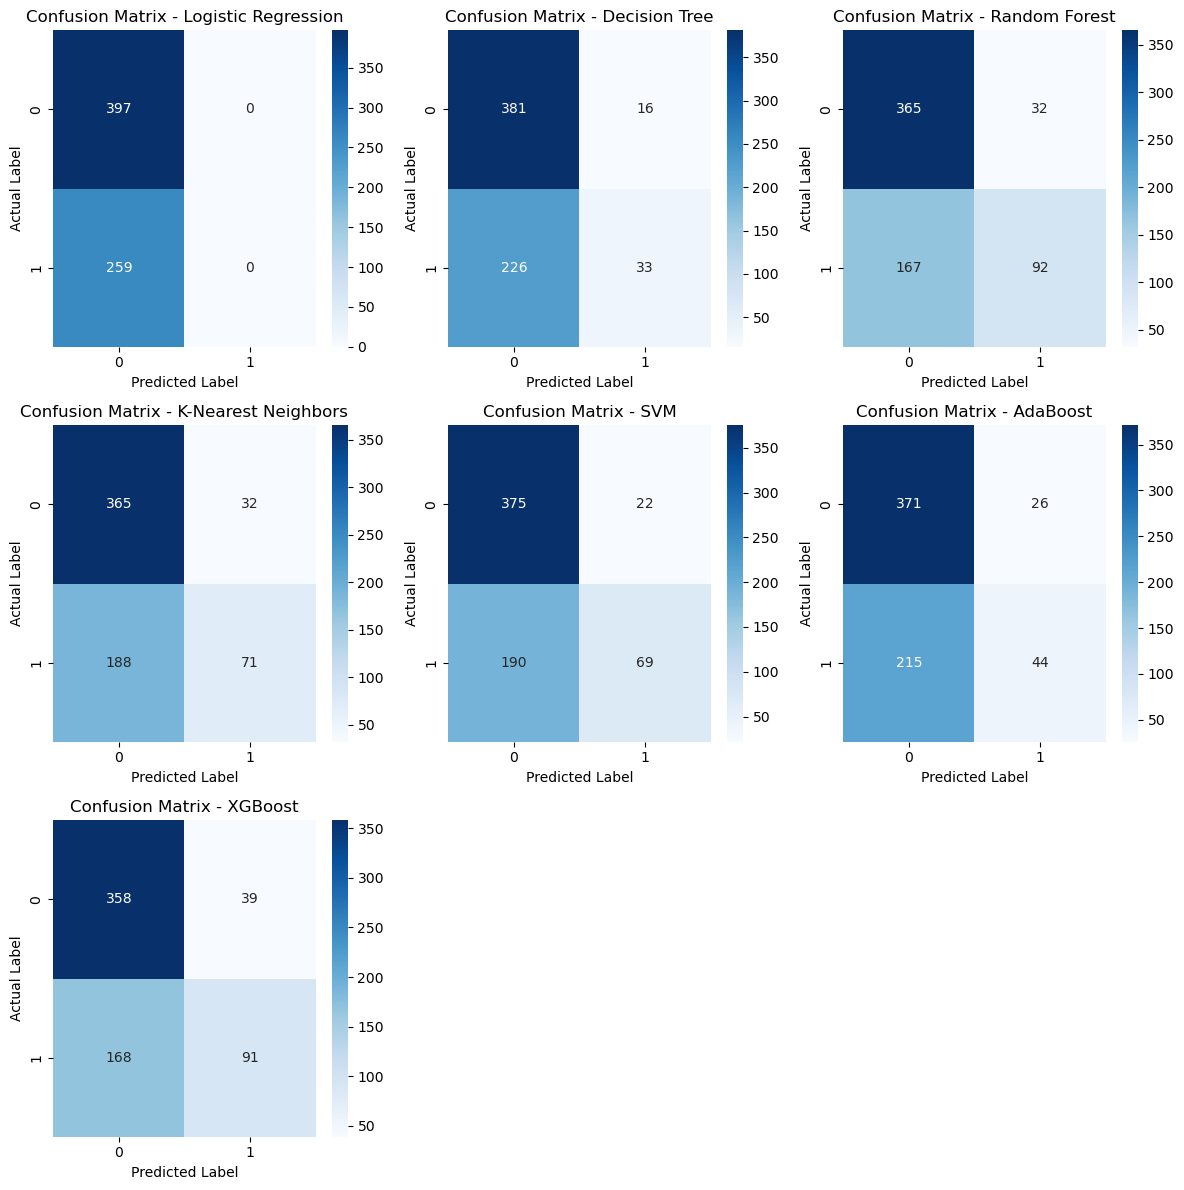

In [703]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define model predictions
models = {
    "Logistic Regression": pred_LR,
    "Decision Tree": pred_DT,
    "Random Forest": pred_rf,
    "K-Nearest Neighbors": pred_NN,
    "SVM": pred_svm,
    "AdaBoost": y_pred_ada,
    "XGBoost": y_pred_xg
}

# Create subplots (adjust number if needed)
num_models = len(models)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 grid, but might not need all
axes = axes.flatten()

for idx, (model_name, y_pred) in enumerate(models.items()):
    if idx >= len(axes):  # Prevent exceeding available subplots
        break  

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {model_name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("Actual Label")

# Remove any empty subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
